In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.linear_model import LinearRegression
df=pd.read_csv('/Users/erningxu/Desktop/data assignment/Final_Report/data/garments_worker_productivity.csv')
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['department'] = df['department'].str.strip().str.lower()
df['department'] = df['department'].replace({'sweing': 'sewing', 'finishing ': 'finishing'})
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
print('rows: '+str(df.shape[0]))
print('columns: '+str(df.shape[1]))

rows: 1197
columns: 15


Missing value:

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [5]:
df.describe()

,date,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488


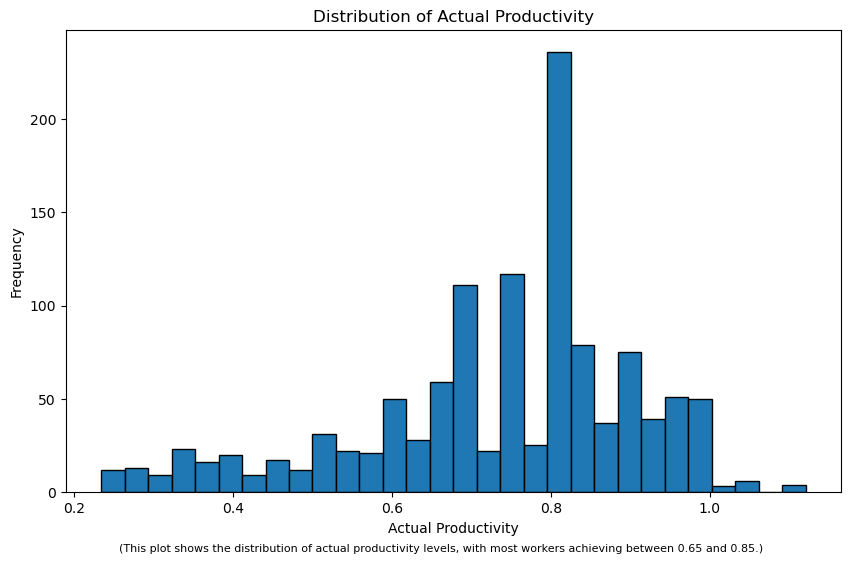

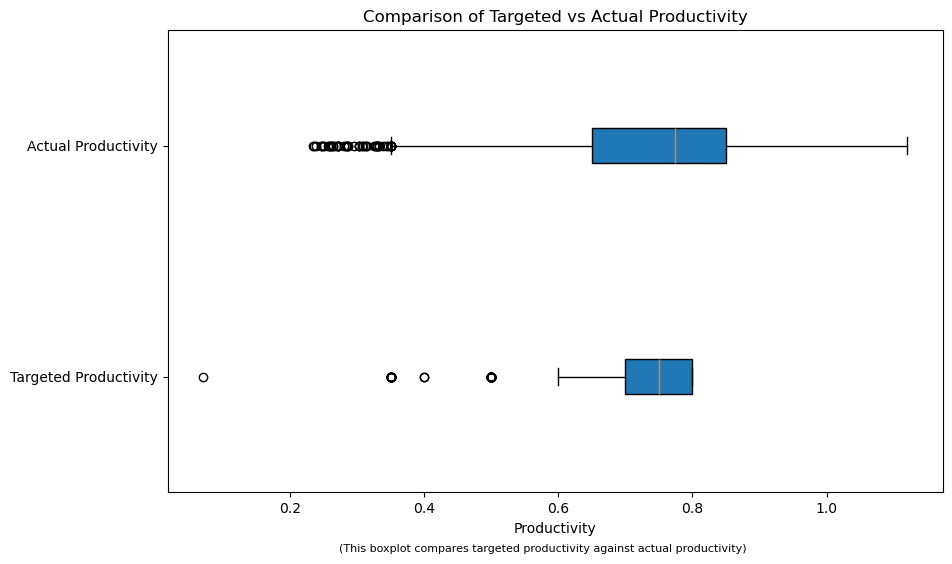

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['actual_productivity'], bins=30, edgecolor='black')
plt.title('Distribution of Actual Productivity')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.figtext(0.5, 0.01, '(This plot shows the distribution of actual productivity levels, with most workers achieving between 0.65 and 0.85.)', ha='center', fontsize=8)
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot([df['targeted_productivity'], df['actual_productivity']],patch_artist=True,vert=False)
plt.yticks([1, 2], ['Targeted Productivity', 'Actual Productivity'])
plt.title('Comparison of Targeted vs Actual Productivity')
plt.xlabel('Productivity')
plt.figtext(0.5, 0.01, '(This boxplot compares targeted productivity against actual productivity)', ha='center', fontsize=8)
plt.show()



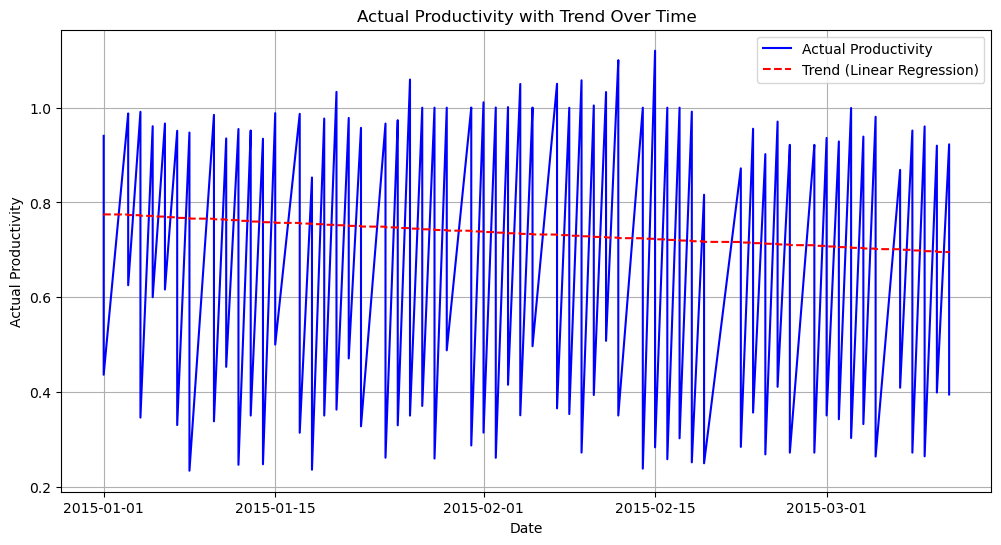

In [7]:
df_trend = df.copy()
df_trend.set_index('date', inplace=True)
numerical_time_index = np.arange(len(df_trend))
df_trend_clean = df_trend.dropna(subset=['actual_productivity'])
X = numerical_time_index[:len(df_trend_clean)].reshape(-1, 1)
y = df_trend_clean['actual_productivity'].values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(df_trend_clean.index, df_trend_clean['actual_productivity'], label='Actual Productivity', color='blue')
plt.plot(df_trend_clean.index, trend, label='Trend (Linear Regression)', color='red', linestyle='--')
plt.title('Actual Productivity with Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')
plt.legend()
plt.grid(True)
plt.show()


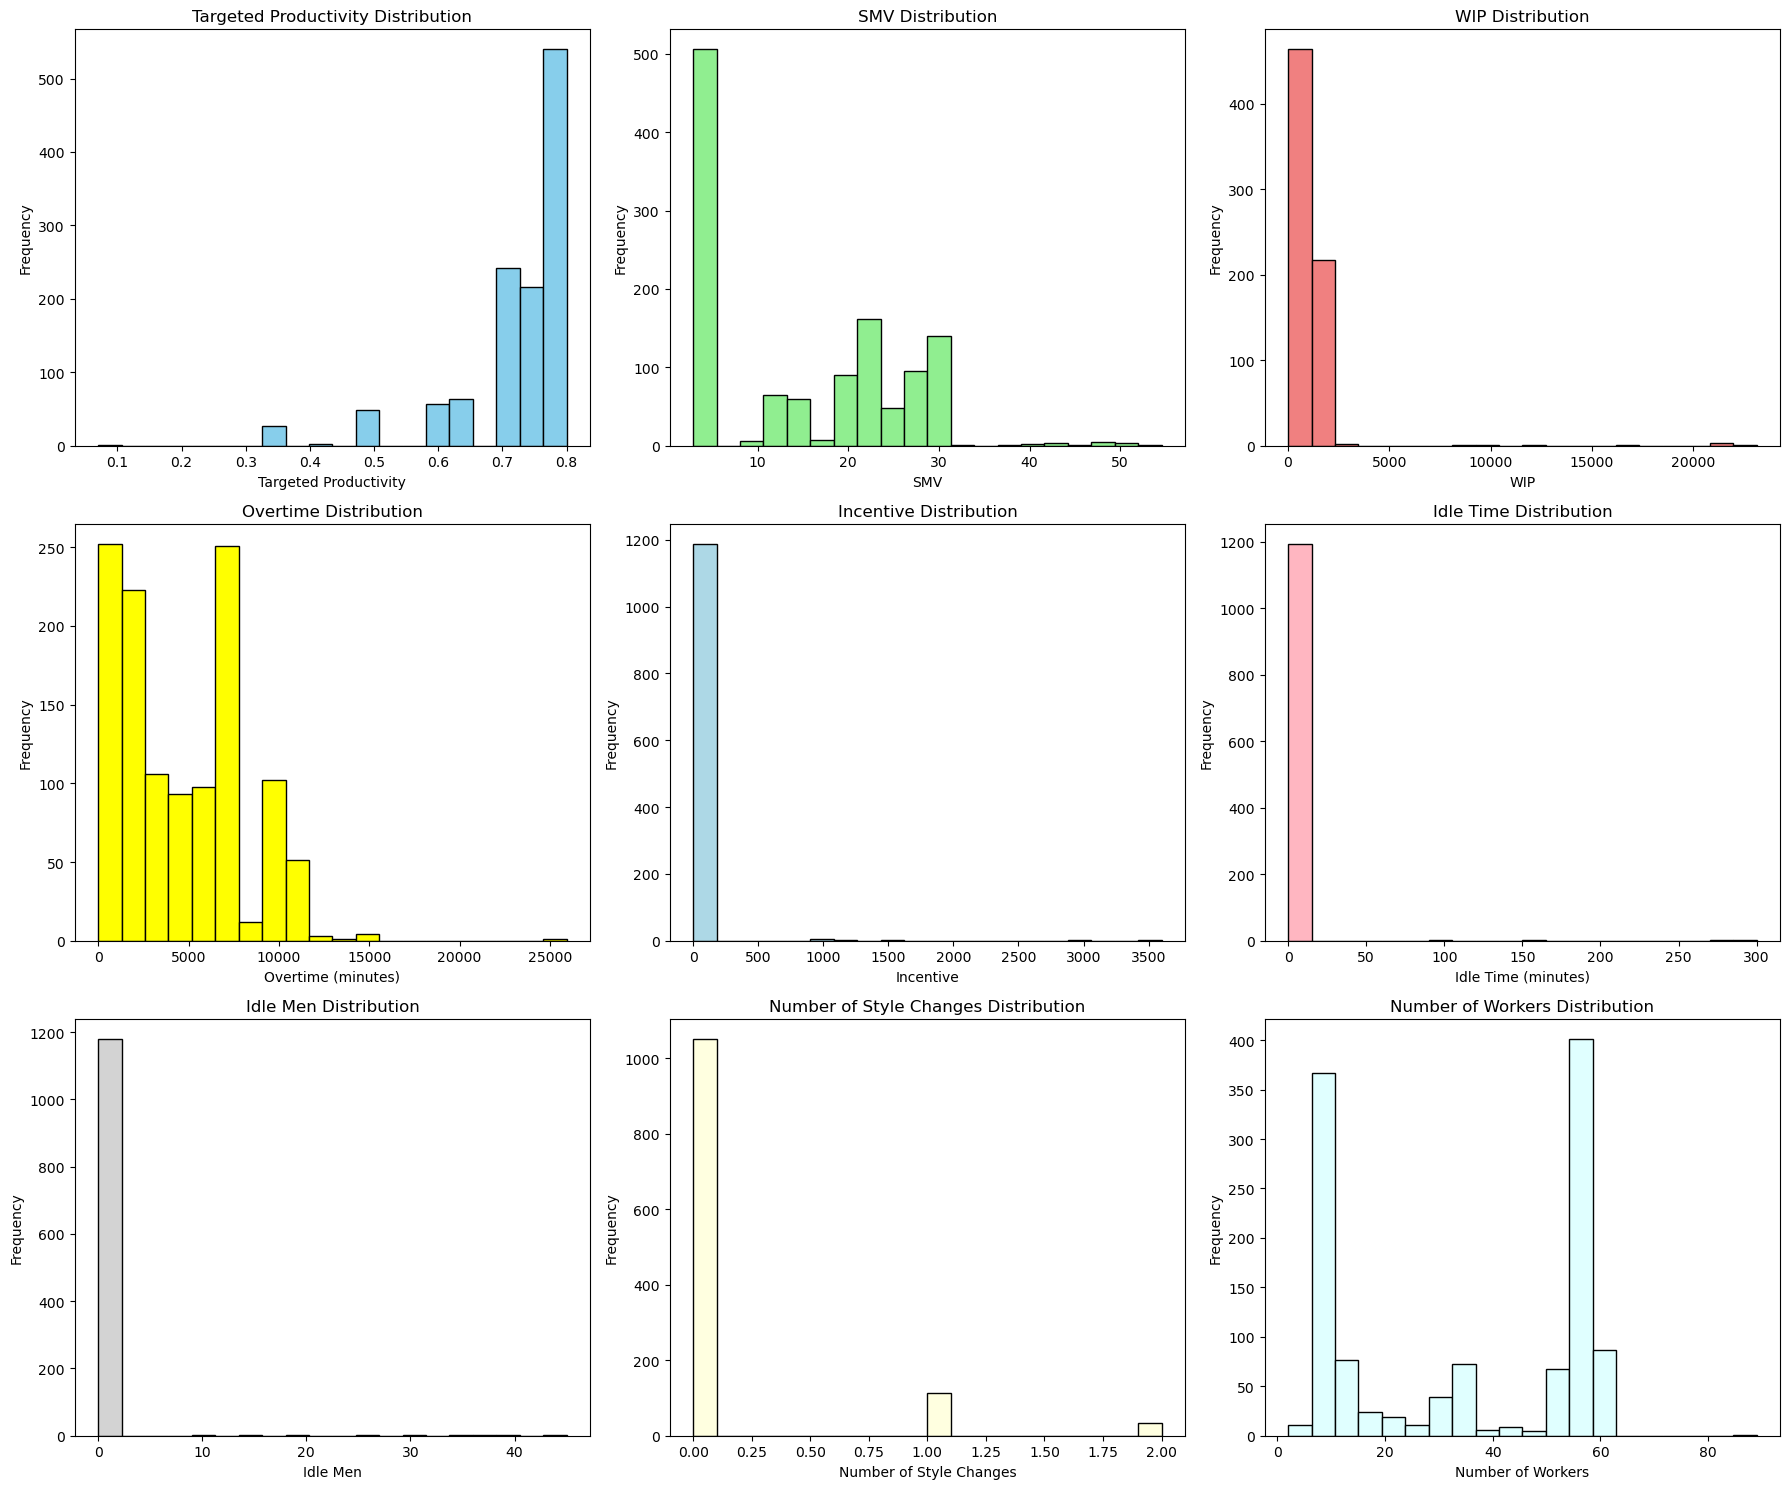

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes[0, 0].hist(df['targeted_productivity'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Targeted Productivity Distribution')
axes[0, 0].set_xlabel('Targeted Productivity')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['smv'].dropna(), bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('SMV Distribution')
axes[0, 1].set_xlabel('SMV')
axes[0, 1].set_ylabel('Frequency')

axes[0, 2].hist(df['wip'].dropna(), bins=20, color='lightcoral', edgecolor='black')
axes[0, 2].set_title('WIP Distribution')
axes[0, 2].set_xlabel('WIP')
axes[0, 2].set_ylabel('Frequency')

axes[1, 0].hist(df['over_time'].dropna(), bins=20, color='yellow', edgecolor='black')
axes[1, 0].set_title('Overtime Distribution')
axes[1, 0].set_xlabel('Overtime (minutes)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['incentive'].dropna(), bins=20, color='lightblue', edgecolor='black')
axes[1, 1].set_title('Incentive Distribution')
axes[1, 1].set_xlabel('Incentive')
axes[1, 1].set_ylabel('Frequency')

axes[1, 2].hist(df['idle_time'].dropna(), bins=20, color='lightpink', edgecolor='black')
axes[1, 2].set_title('Idle Time Distribution')
axes[1, 2].set_xlabel('Idle Time (minutes)')
axes[1, 2].set_ylabel('Frequency')

axes[2, 0].hist(df['idle_men'].dropna(), bins=20, color='lightgrey', edgecolor='black')
axes[2, 0].set_title('Idle Men Distribution')
axes[2, 0].set_xlabel('Idle Men')
axes[2, 0].set_ylabel('Frequency')

axes[2, 1].hist(df['no_of_style_change'].dropna(), bins=20, color='lightyellow', edgecolor='black')
axes[2, 1].set_title('Number of Style Changes Distribution')
axes[2, 1].set_xlabel('Number of Style Changes')
axes[2, 1].set_ylabel('Frequency')

axes[2, 2].hist(df['no_of_workers'].dropna(), bins=20, color='lightcyan', edgecolor='black')
axes[2, 2].set_title('Number of Workers Distribution')
axes[2, 2].set_xlabel('Number of Workers')
axes[2, 2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

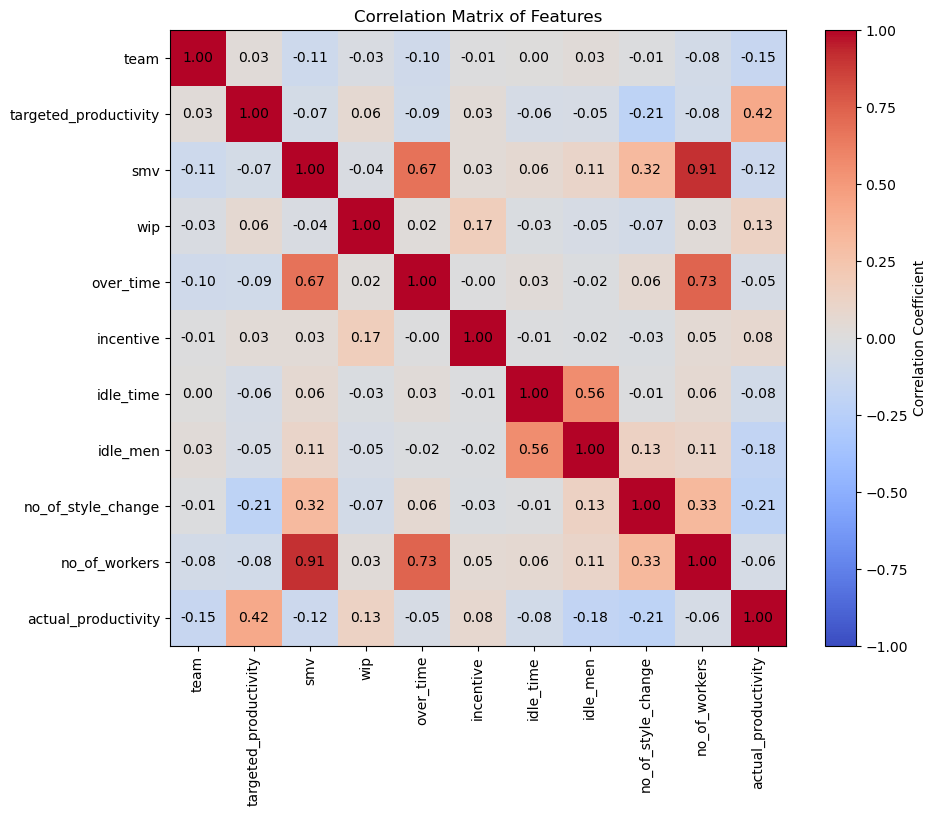

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix,cmap='coolwarm',interpolation='none', vmin=-1, vmax=1)
plt.colorbar(label="Correlation Coefficient")
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
for (i, j), value in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')
plt.title('Correlation Matrix of Features')
plt.show()



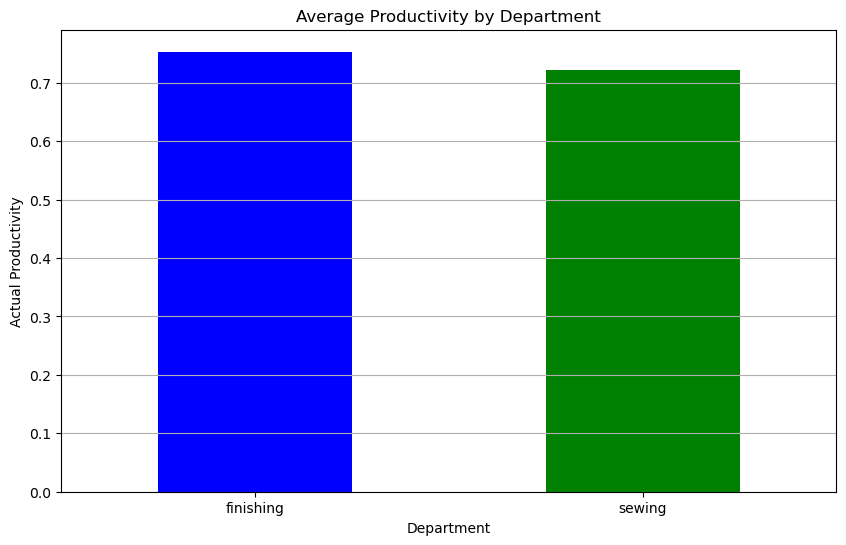

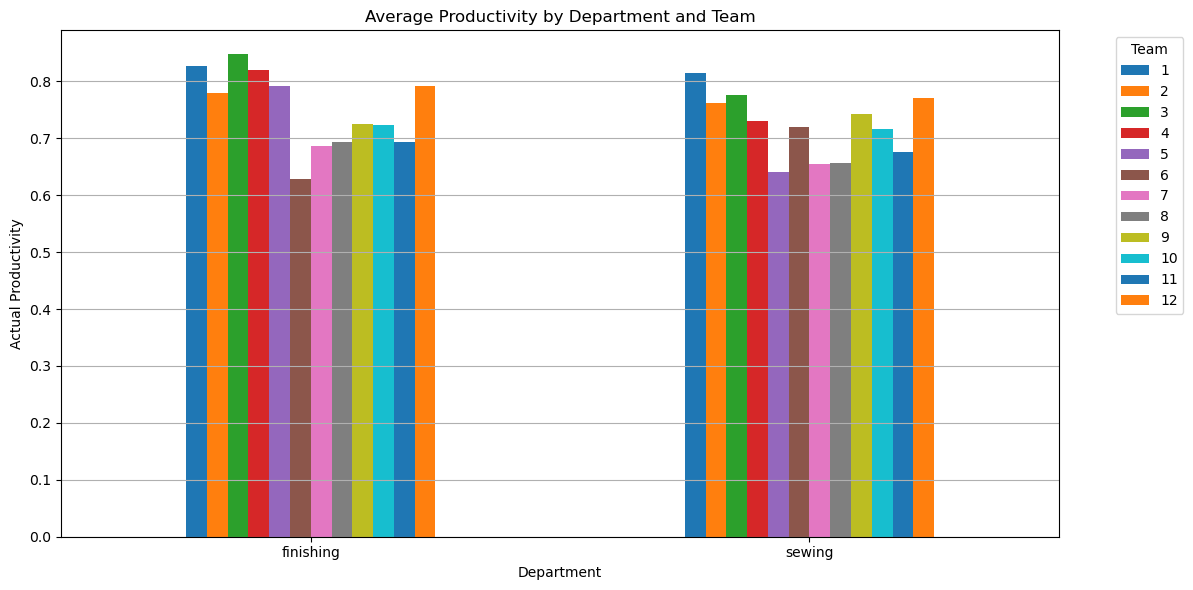

In [10]:
department_avg_productivity = df.groupby('department')['actual_productivity'].mean()

# Plotting the average productivity by department
plt.figure(figsize=(10, 6))
department_avg_productivity.plot(kind='bar', color=['blue', 'green'])
plt.title('Average Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Analyzing the average productivity by department and team
department_team_avg_productivity = df.groupby(['department', 'team'])['actual_productivity'].mean().unstack()

# Plotting the average productivity by department and team
department_team_avg_productivity.plot(kind='bar', figsize=(12, 6))
plt.title('Average Productivity by Department and Team')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.xticks(rotation=0)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [11]:
from sklearn.model_selection import TimeSeriesSplit
data = df.sort_values(by='date')
X = df.drop(columns=['date', 'actual_productivity'])  
y = df['actual_productivity']

tscv = TimeSeriesSplit(n_splits=3)
splits = list(tscv.split(X, y))
train_index = splits[0][0]  
val_index = splits[1][1]     
test_index = splits[2][1]   
X_train = X.iloc[train_index]
y_train = y.iloc[train_index]
X_val = X.iloc[val_index]
y_val = y.iloc[val_index]
X_test = X.iloc[test_index]
y_test = y.iloc[test_index]


train_date_range = (data.iloc[train_index]['date'].min(), data.iloc[train_index]['date'].max())
val_date_range = (data.iloc[val_index]['date'].min(), data.iloc[val_index]['date'].max())
test_date_range = (data.iloc[test_index]['date'].min(), data.iloc[test_index]['date'].max())

print("Training set date range:", train_date_range)
print("Validation set date range:", val_date_range)
print("Test set date range:", test_date_range)


Training set date range: (Timestamp('2015-01-01 00:00:00'), Timestamp('2015-01-18 00:00:00'))
Validation set date range: (Timestamp('2015-02-04 00:00:00'), Timestamp('2015-02-23 00:00:00'))
Test set date range: (Timestamp('2015-02-23 00:00:00'), Timestamp('2015-03-11 00:00:00'))


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
onehot_ftrs = ['department', 'day','quarter']  
std_ftrs = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'team', 'no_of_workers']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(300, 13)
(300, 21)
[[ 0.          1.          0.         ...  0.          0.50022296
   1.12456265]
 [ 1.          0.          0.         ...  0.         -1.56762787
  -1.12016124]
 [ 0.          1.          0.         ...  0.          1.38644475
  -0.12984187]
 ...
 [ 0.          1.          0.         ...  0.         -0.38599882
   1.08054846]
 [ 1.          0.          0.         ...  0.          1.38644475
  -1.16417543]
 [ 1.          0.          0.         ...  0.         -0.38599882
  -1.12016124]]


In [15]:
import os
output_directory = "/Users/erningxu/Desktop/data assignment/Final_Report/data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)  
os.chdir(output_directory)
df.to_csv("data_after_EDA.csv", index=False)
print(f"File saved to {os.path.join(output_directory, 'data_after_EDA.csv')}")


File saved to /Users/erningxu/Desktop/data assignment/Final_Report/data/data_after_EDA.csv
